In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from copy import copy, deepcopy
import random

In [ ]:
State_Matrix = \
    np.array([[0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0],
              [0, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 0],
              [0, 214, 215, 216, 217,   0, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 0],
              [0, 197, 198, 199, 200,   0, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 0],
              [0, 193, 194,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 195, 196, 0],
              [0, 176, 177,   0, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 0],
              [0, 162, 163,   0, 164, 165,   0, 166, 167,   0, 168, 169, 170, 171, 172,   0, 173, 174, 175, 0],
              [0, 151, 152,   0, 153, 154,   0, 155, 156,   0, 157, 158,   0,   0,   0,   0, 159, 160, 161, 0],
              [0, 136, 137, 138, 139, 140,   0, 141, 142,   0, 143, 144, 145, 146, 147,   0, 148, 149, 150, 0],
              [0, 121, 122, 123, 124, 125,   0, 126, 127,   0, 128, 129, 130, 131, 132,   0, 133, 134, 135, 0],
              [0,   0,   0,   0,   0, 111,   0, 112, 113,   0,   0, 114, 115, 116, 117,   0, 118, 119, 120, 0],
              [0,  99, 100, 101, 102, 103,   0, 104, 105, 106,   0, 107, 108,   0, 109,   0,   0,   0, 110, 0],
              [0,  89,  90,   np.NAN,   np.NAN,   np.NAN,  np.NAN,   np.NAN,  91,  92,   0,  93,  94,   0,  95,  96,  97,   0,  98, 0],
              [0,  75,  76,  77,  78,  79,  80,   0,  81,  82,   0,  83,  84,   0,  85,  86,  87,   0,  88, 0],
              [0,  60,  61,  62,  63,  64,  65,   0,  66,  67,   0,  68,  69,   0,  70,  71,  72,  73,  74, 0],
              [0,  47,  48,  49,  50,  51,  52,   0,  53,  54,  55,  56,  57,   0,   0,   0,   0,  58,  59, 0],
              [0,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46, 0],
              [0,   0,   0,  19,  20,  21,  22,   0,   0,   0,   0,   0,   0,  23,  24,  25,  26,  27,  28, 0],
              [0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18, 0],
              [0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 0]])
#convert boundaries & all walls in matrix to np.NAN
State_Matrix[0,:]=np.NAN
State_Matrix[-1,:]=np.NAN
State_Matrix[:,0]=np.NAN
State_Matrix[:,-1]=np.NAN
for i in range(20):
  for j in range(20):
    if(State_Matrix[i][j]==0):
      State_Matrix[i][j]=np.NAN

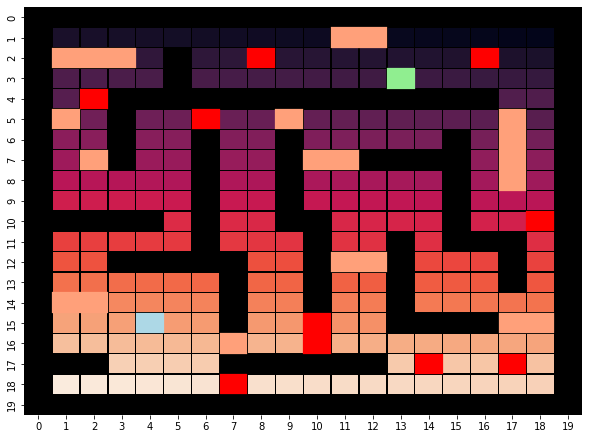

In [ ]:
""" Function to always color the oil, bump, start, and green blocks.
 States are in the form of a list of (i,j) coordinates on the state matrix"""
def coloring_blocks(heatmap, oil_states, bump_states, start_state, end_state):
    # Adding red oil blocks
    for i in range(len(oil_states)):
        heatmap.add_patch(Rectangle((oil_states[i][1], oil_states[i][0]), 1, 1,
                                    fill=True, facecolor='red', edgecolor='red', lw=0.25))
    # Adding salmon bump blocks
    for i in range(len(bump_states)):
        heatmap.add_patch(Rectangle((bump_states[i][1], bump_states[i][0]), 1, 1,
                                    fill=True, facecolor='lightsalmon', edgecolor='lightsalmon', lw=0.25))
    # Adding start block (Blue)
    heatmap.add_patch(Rectangle((start_state[1], start_state[0]), 1, 1,
                                fill=True, facecolor='lightblue', edgecolor='lightblue', lw=0.25))

    # Adding end block (Green)
    heatmap.add_patch(Rectangle((end_state[1], end_state[0]), 1, 1,
                                fill=True, facecolor='lightgreen', edgecolor='lightgreen', lw=0.25))

# Example Use
plt.subplots(figsize=(10,7.5))    
heatmap = sns.heatmap(State_Matrix, fmt=".2f", linewidths=0.25, linecolor='black',
                      cbar= False, cmap= 'rocket_r')
heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
coloring_blocks(heatmap, oil_states=[(2,8),(2,16),(4,2),(5,6),(10,18),(15,10),(16,10),(17,14),(17,17),(18,7)], bump_states=[(1,11),(1,12),(2,1),(2,2),(2,3),(5,1),(5,9),(5,17),(6,17),(7,2),(7,10),(7,11),(7,17),(8,17),(12,11),(12,12),(14,1),(14,2),(15,17),(15,18),(16,7)], \
                start_state=(15,4),end_state=(3,13))
plt.show()

In [ ]:
"""Initializations"""
value_matrix=np.copy(State_Matrix)
oil_states=[(2,8),(2,16),(4,2),(5,6),(10,18),(15,10),(16,10),(17,14),(17,17),(18,7)]
start_state=(15,4)
end_state=(3,13)
bump_states=[(1,11),(1,12),(2,1),(2,2),(2,3),(5,1),(5,9),(5,17),(6,17),(7,2),(7,10),(7,11),(7,17),(8,17),(12,11),(12,12),(14,1),(14,2),(15,17),(15,18),(16,7)]
actions=["left","right","up","down"]
def check_wall_state(i,j):
  if(np.isnan(value_matrix[i][j])):
    return True
  return False
def check_bump(i,j):
  if((i,j) in bump_states):
    return True
  return False
def check_oil(i,j):
  if((i,j) in oil_states):
    return True
  return False
def check_goal(i,j):
  if(i==end_state[0] and j==end_state[1]):
    return True
  return False
# use np.NAN to check if state is a wall state
# intialize policy to all left
policy=np.zeros((20,20))
for i in range(20):
  for j in range(20):
    if(np.isnan(value_matrix[i][j])):
      policy[i][j]=np.nan
      continue
    '''elif(check_goal(i,j)):
      policy[i][j]=np.nan
      value_matrix[i][j]=0'''
    value_matrix[i][j]=0

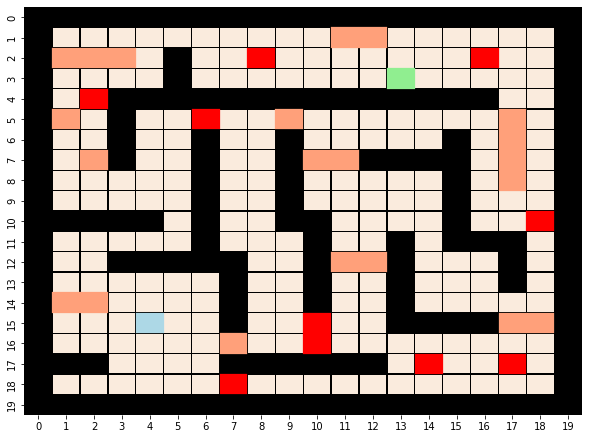

In [ ]:
"""check intializations"""

assert(len(oil_states)==10)
assert(len(bump_states)==21)
assert(start_state==(15,4))
assert(end_state==(3,13))
for i in range(20):
  for j in range(20):
    if(check_wall_state(i,j)):# or check_goal_state(i,j)
      continue
    else:
      assert(actions[int(policy[i][j])]=="left")
assert(check_wall_state(0,1)==True)
assert(check_wall_state(19,0)==True)
assert(check_wall_state(0,19)==True)
assert(check_bump(1,11)==True)
assert(check_oil(2,8)==True)
plt.subplots(figsize=(10,7.5))    
heatmap = sns.heatmap(value_matrix, fmt=".2f", linewidths=0.25, linecolor='black',
                      cbar= False, cmap= 'rocket_r')
heatmap.set_facecolor('black') # Color for the NaN cells in the state matrix
coloring_blocks(heatmap, oil_states=oil_states, bump_states=bump_states, \
                start_state=start_state,end_state=end_state)
plt.show()

In [ ]:
def calc_reward(i1,j1,i2,j2):
  reward=-1
  i3=i2
  j3=j2
  if(check_wall_state(i2,j2)):
    i3=i1
    j3=j1
    if(check_bump(i1,j1)):
      reward-=10
    elif(check_oil(i1,j1)):
      reward-=5
    elif(check_goal(i1,j1)):
      #raise Exception("This situation should not arise. Moving from terminal goal state.")
      reward+=200
  else:
    if(check_bump(i2,j2)):
      reward-=10
    elif(check_oil(i2,j2)):
      reward-=5
    elif(check_goal(i2,j2)):
      reward+=200
  return reward,i3,j3

In [ ]:
def test_calc_reward():
  assert(calc_reward(18,17,17,17)==(-6,17,17))
  assert(calc_reward(16,17,15,17)==(-11,15,17))
  assert(calc_reward(16,16,15,16)==(-1,16,16))
  assert(calc_reward(18,18,18,17)==(-1,18,17))
  assert(calc_reward(18,18,17,18)==(-1,17,18))
  assert(calc_reward(18,18,19,18)==(-1,18,18))
  assert(calc_reward(18,18,18,19)==(-1,18,18))
  assert(calc_reward(17,13,17,14)==(-6,17,14))
  assert(calc_reward(7,2,7,3)==(-11,7,2))
test_calc_reward()

In [ ]:
def epsilonGreedy(qa1,qa2,qa3,qa4,epsilon):
  qlist=[qa1,qa2,qa3,qa4]
  action = np.random.uniform()
  # exploration
  if(action<epsilon):
    #print("in exploration")
    non_greedy_choice=random.randint(0,3)
    #print("greedy choice:{}".format(greedy_choice))
    action_taken=non_greedy_choice+1
    '''if(non_greedy_choice==0):
      action_taken=1
    elif(non_greedy_choice==1):
      action_taken=2
    elif(non_greedy_choice==2):
      action_taken=3
    elif(non_greedy_choice==3):
      action_taken=4'''
    return action_taken
  # greedy approach - exploitation
  # randommization for equal case
  maxq=max(qlist)
  if(qlist[0]==qlist[1]):
    maxindex=random.randint(0,1)
  max_list=[]
  for i in range(len(qlist)):
    if(np.isclose(qlist[i],maxq)):
      max_list.append(i)
  maxindex = random.choice(max_list)
  #print(maxindex)
  action_taken=maxindex+1
  return action_taken

In [ ]:
def test_epsilon_greedy():
  print(epsilonGreedy(1,2,3,4,0.5))
test_epsilon_greedy()

2


In [ ]:
def create_Q_Matrix(value_matrix,action_space_size):
  dim1=value_matrix.shape[0]
  dim2=value_matrix.shape[1]
  Q_Matrix=np.zeros((dim1,dim2,action_space_size))
  for i in range(dim1):
    for j in range(dim2):
      if(np.isnan(value_matrix[i][j])):
        for k in range(action_space_size):
          Q_Matrix[i,j,k]=np.nan
  return Q_Matrix

In [ ]:
'''test create Q Matrix'''
def test_create_Q_Matrix():
  test_q_matrix=create_Q_Matrix(value_matrix,4)
  assert(test_q_matrix.shape[0]==value_matrix.shape[0])
  assert(test_q_matrix.shape[1]==value_matrix.shape[1])
  assert(test_q_matrix.shape[2]==4)
  assert(np.isnan(test_q_matrix[0,0,1]))
  assert(np.isnan(test_q_matrix[6,6,1]))
test_create_Q_Matrix()

In [ ]:
def find_max_Q(qmatrix,i,j,action_space_size):
  max=qmatrix[i,j,0]
  pos=0
  for k in range(action_space_size):
    if(qmatrix[i,j,k]>max):
      max=qmatrix[i,j,k]
      pos=k
  # check for multiple equal Q-values
  maxposlist=[]
  for k in range(action_space_size):
    if(qmatrix[i,j,k]==max):
      maxposlist.append(k)
  pos=np.random.choice(maxposlist)
  max=qmatrix[i,j,pos]
  return max,pos


In [ ]:
def test_find_max_Q():
  qmatrix=create_Q_Matrix(value_matrix,4)
  max_item,max_index=find_max_Q(qmatrix,start_state[0],start_state[1],4)
  assert(max_item==0)
  print(max_index)
test_find_max_Q()

1


In [ ]:
def decide_stochastic_action(ulimit,decider,action_list,main_action):
  if(decider<ulimit):
    return main_action
  else:
    return np.random.choice(action_list)

In [ ]:
def test_decide_stochastic_action_taken():
  action_list_test=[1,2,3]
  assert(decide_stochastic_action(0.98,0.97,action_list_test,4)==4)
  assert((decide_stochastic_action(0.98,0.99,action_list_test,4)==4)==False)
  print(decide_stochastic_action(0.98,0.99,action_list_test,4))
test_decide_stochastic_action_taken()

2


In [ ]:
def compute_next_stochastic_state(intial_x,intial_y,stochastic_action):
  if(stochastic_action==1):
    fx=intial_x-1
    fy=intial_y
  elif(stochastic_action==2):
    fx=intial_x
    fy=intial_y+1
  elif(stochastic_action==3):
    fx=intial_x+1
    fy=intial_y
  else:
    fx=intial_x
    fy=intial_y-1
  return fx,fy

In [ ]:
def test_compute_next_stochastic_state():
  assert(compute_next_stochastic_state(1,1,2)==(1,2))
  assert(compute_next_stochastic_state(2,3,1)==(1,3))
  assert(compute_next_stochastic_state(2,3,3)==(3,3))
  assert(compute_next_stochastic_state(2,3,4)==(2,2))
test_compute_next_stochastic_state()

In [ ]:
def stochastic_action_taken(action_taken,state_x,state_y,p,action_state_size):
  ulimit = 1-p
  decider=np.random.uniform()
  if(action_taken==1):
    action_list=[2,3,4]
    stochastic_action= decide_stochastic_action(ulimit,decider,action_list,1)
    nx,ny= compute_next_stochastic_state(state_x,state_y,stochastic_action)
  elif(action_taken==2):
    action_list=[1,3,4]
    stochastic_action= decide_stochastic_action(ulimit,decider,action_list,2)
    nx,ny= compute_next_stochastic_state(state_x,state_y,stochastic_action)
  elif(action_taken==3):
    action_list=[1,2,4]
    stochastic_action= decide_stochastic_action(ulimit,decider,action_list,3)
    nx,ny= compute_next_stochastic_state(state_x,state_y,stochastic_action)
  else:
    action_list=[1,2,3]
    stochastic_action= decide_stochastic_action(ulimit,decider,action_list,4)
    nx,ny= compute_next_stochastic_state(state_x,state_y,stochastic_action)
  return nx,ny

In [ ]:
def test_stochastic_action_taken():
  count_normal=0
  count_right=0
  count_down=0
  count_left=0
  for i in range(1000):
    nx,ny=stochastic_action_taken(1,2,2,0.02,4)
    if(nx==1 and ny==2):
      count_normal+=1
    elif(nx==2 and ny==3):
      count_right+=1
    elif(nx==3 and ny==2):
      count_down+=1
    else:
      count_left+=1
  assert(count_normal>950)
  print(count_down+count_left+count_right)
  assert(count_down>1)
  assert(count_right>1)
  assert(count_left>1)
test_stochastic_action_taken()

14


In [ ]:
def Q_Learning(value_matrix,action_space_size,epsilon,alpha,gamma,p,episodes_limit,steps_limit):
  Q_Matrix=create_Q_Matrix(value_matrix,action_space_size)
  rewards_in_episodes=[]
  for i in range(episodes_limit):
    # an episode
    in_episode_total=0
    state=start_state
    steps_iter=0
    while(check_goal(state[0],state[1])==False):
      steps_iter+=1
      if(steps_iter>steps_limit):
        break
      cx=state[0]
      cy=state[1]
      action_to_take=epsilonGreedy(Q_Matrix[cx,cy,0],Q_Matrix[cx,cy,1],Q_Matrix[cx,cy,2],Q_Matrix[cx,cy,3],epsilon)
      if(action_to_take==1):
        ni,nj=stochastic_action_taken(action_to_take,cx,cy,p,action_space_size)
        reward,fx,fy=calc_reward(cx,cy,ni,nj)
      elif(action_to_take==2):
        ni,nj=stochastic_action_taken(action_to_take,cx,cy,p,action_space_size)
        reward,fx,fy=calc_reward(cx,cy,ni,nj)
      elif(action_to_take==3):
        ni,nj=stochastic_action_taken(action_to_take,cx,cy,p,action_space_size)
        reward,fx,fy=calc_reward(cx,cy,ni,nj)
      else:
        ni,nj=stochastic_action_taken(action_to_take,cx,cy,p,action_space_size)
        reward,fx,fy=calc_reward(cx,cy,ni,nj)
      in_episode_total+=reward
      max_q,max_q_action=find_max_Q(Q_Matrix,fx,fy,action_space_size)
      Q_Matrix[cx,cy,action_to_take-1]+=alpha*(reward+gamma*max_q-Q_Matrix[cx,cy,action_to_take-1])
      state=(fx,fy)
    rewards_in_episodes.append(in_episode_total/steps_iter)
  return Q_Matrix,rewards_in_episodes

In [ ]:
def test_Q_learning():
  test_q_matrix,rewards_in_episodes=Q_Learning(value_matrix,4,0.1,0.3,0.95,0.02,1000,1000)
  print(test_q_matrix[start_state[0],start_state[1]])
  assert(len(rewards_in_episodes)==1000)
test_Q_learning()

[9.27615233 7.75228122 7.88527085 9.93773334]


In [ ]:
def generate_Q_learning_policy(Q_Matrix):
  xdim=value_matrix.shape[0]
  ydim=value_matrix.shape[1]
  action_space_size=np.shape(Q_Matrix)[2]
  policy=np.zeros((xdim,ydim))
  for i in range(xdim):
    for j in range(ydim):
      if(np.isnan(value_matrix[i][j])):
        continue
      else:
        max_q,max_q_action=find_max_Q(Q_Matrix,i,j,action_space_size)
        policy[i][j]=max_q_action
  return policy

In [ ]:
def create_path_dict(policy):
  paths={}
  for i in range(20):
    for j in range(20):
      if(check_wall_state(i,j)): #check_goal(i,j) or 
        continue
      else:
        paths[(i,j)]=int(policy[i][j])
  return paths
def plot_policy(paths):
  # Define heatmap first
  plt.subplots(figsize=(13, 13))
  heatmap = sns.heatmap(value_matrix, fmt=".2f", linewidths=0.25, linecolor='black', cbar=False, cmap='rocket_r')
  heatmap.set_facecolor('black') 
  coloring_blocks(heatmap, oil_states=oil_states, bump_states=bump_states, \
                  start_state=start_state,end_state=end_state)
  for i in range(20):
    for j in range(20):
      if(check_wall_state(i,j)): #check_goal(i,j) or 
        continue
      else:
        direction=paths[(i,j)]
        r = i # x_coordinate
        c = j # y_coordinate

        if direction == 1:
            plt.arrow(c + 0.5, r + 0.5, 0.8, 0, width=0.04, color='black')   # Right
        if direction == 3:
            plt.arrow(c + 0.5, r + 0.5, -0.8, 0, width=0.04, color='black')  # Left
        if direction == 0:
            plt.arrow(c + 0.5, r + 0.5, 0, -0.8, width=0.04, color='black')  # Up
        if direction == 2:
            plt.arrow(c + 0.5, r + 0.5, 0, 0.8, width=0.04, color='black')  # Down
  # Show plot
  plt.show()
'''def plot_value_graph(values):
  plt.subplots(figsize=(13,13))
  heatmap = sns.heatmap(State_Matrix, fmt=".2f", annot= values, linewidths=0.25, linecolor='black',
                      cbar= False, cmap= 'rocket_r')

  heatmap.set_facecolor('black') # Color for the NA cells in the state matrix
  coloring_blocks(heatmap, oil_states=oil_states, bump_states=bump_states, \
              start_state=start_state,end_state=end_state)
  plt.show()'''
def plot_path(paths):
  iter=0
  state=start_state
  plt.subplots(figsize=(13, 13))
  heatmap = sns.heatmap(value_matrix, fmt=".2f", linewidths=0.25, linecolor='black', cbar=False, cmap='rocket_r')
  heatmap.set_facecolor('black') 
  coloring_blocks(heatmap, oil_states=oil_states, bump_states=bump_states, \
                  start_state=start_state,end_state=end_state)
  path_found_count=0
  while(check_goal(state[0],state[1])==False):
    iter+=1
    if(iter>1000):
      break
    if(check_wall_state(state[0],state[1])):
      continue
    direction=paths[state]
    r=state[0]
    c=state[1]
    if direction == 1:
      state=(r,c+1)
      plt.arrow(c + 0.5, r + 0.5, 0.8, 0, width=0.04, color='black')   # Right
    if direction == 3:
      state=(r,c-1)
      plt.arrow(c + 0.5, r + 0.5, -0.8, 0, width=0.04, color='black')  # Left
    if direction == 0:
      state=(r-1,c)
      plt.arrow(c + 0.5, r + 0.5, 0, -0.8, width=0.04, color='black')  # Up
    if direction == 2:
      state=(r+1,c)
      plt.arrow(c + 0.5, r + 0.5, 0, 0.8, width=0.04, color='black')  # Down
  if(check_goal(state[0],state[1])):
    print("path found")
  plt.show()
def plot_episode_wise_rewards(rewards_in_episodes):
  fig, bob = plt.subplots(figsize=(10, 10),dpi=80)
  bob.set(title = "Accumulated reward vs episodes for alpha=0.3",xlabel = "episodes", ylabel = "Accumulated reward")
  bob.plot(range(1000),rewards_in_episodes)
  #plt.legend(['epsilon=0','epsilon=0.1','epsilon=0.2','epsilon=0.5'])
  plt.show()
def draw_graphs(policy,rewards_in_episodes):
  path_dict=create_path_dict(policy)
  plot_policy(path_dict)
  #plot_value_graph(values)
  plot_path(path_dict)
  plot_episode_wise_rewards(rewards_in_episodes)

In [ ]:
def average_rewards_across_runs(no_of_runs,rewards_across_runs):
  averaged_rewards=[]
  for k in range(len(rewards_across_runs)):
    rewards_across_runs[k]=np.cumsum(rewards_across_runs[k])
    for l1 in range(len(rewards_across_runs[k])):
      rewards_across_runs[k][l1]=(rewards_across_runs[k][l1])/(l1+1)
  for i in range(len(rewards_across_runs[0])):
    component_total=0
    for j in range(len(rewards_across_runs)):
      component_total+=rewards_across_runs[j][i]
    averaged_rewards.append(component_total/(len(rewards_across_runs)))
  return averaged_rewards


In [ ]:
test_reward=[1,2,3,4]
np.cumsum(test_reward)

array([ 1,  3,  6, 10])

In [ ]:
def test_average_rewards_across_runs():
  test_input=[]
  for i in range(10):
    test_ip=[0]*1000
    test_input.append(test_ip)
  test_out=average_rewards_across_runs(10,test_input)
  assert(len(test_out)==1000)
test_average_rewards_across_runs()

In [ ]:
def path_to_goal_exsists(paths):
  iter=0
  state=start_state
  while(check_goal(state[0],state[1])==False):
    iter+=1
    if(iter>1000):
      break
    if(check_wall_state(state[0],state[1])):
      continue
    direction=paths[state]
    r=state[0]
    c=state[1]
    if direction == 1:
      state=(r,c+1)
    if direction == 3:
      state=(r,c-1)  # Left 
    if direction == 0:
      state=(r-1,c) # Up  
    if direction == 2:
      state=(r+1,c)  # Down
  if(check_goal(state[0],state[1])):
    print("path found")
    return True

path found
path found
path found
path found
path found
path found
path found
path found
path found
path found


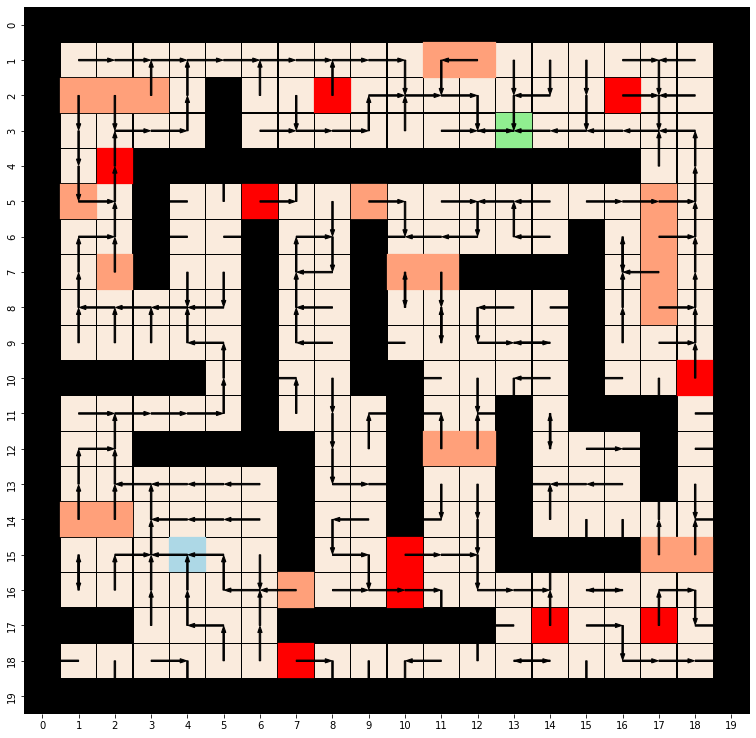

path found


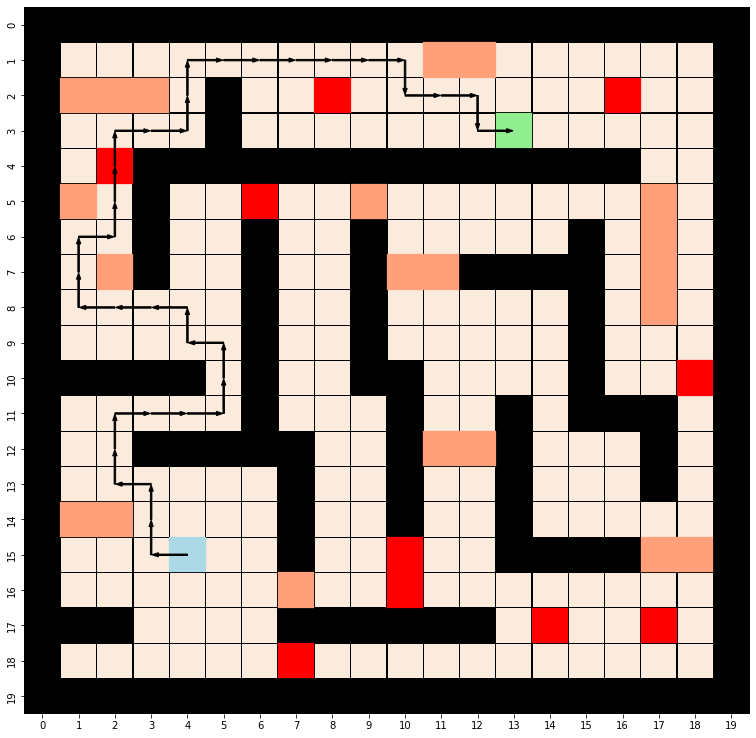

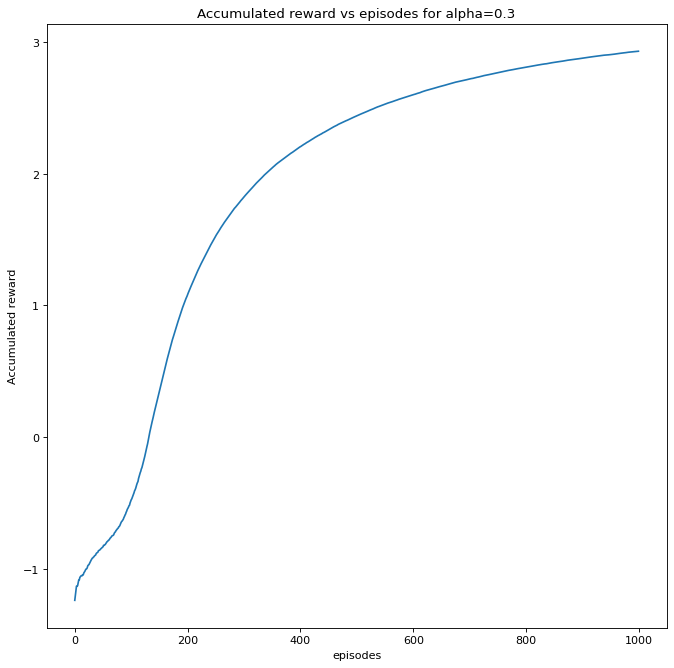

In [ ]:
def run_Q_learning(no_of_runs):
  rewards_across_runs=[]
  policy_to_display=None
  for i in range(no_of_runs):
    q,rewards=Q_Learning(value_matrix,4,0.1,0.3,0.95,0.02,1000,1000)
    policy=generate_Q_learning_policy(q)
    rewards_across_runs.append(rewards)
    if(policy[start_state[0],start_state[1]]==3):
      policy_to_display=policy
    path=create_path_dict(policy)
    path_to_goal_exsists(path)
  rewards=average_rewards_across_runs(no_of_runs,rewards_across_runs)
  if(policy_to_display.any()!=None):
    policy=policy_to_display
  draw_graphs(policy,rewards)
  return rewards
q_learning_rewards=run_Q_learning(10)

**SARSA**

In [ ]:
def SARSA_learning(value_matrix,action_space_size,epsilon,alpha,gamma,p,episodes_limit,steps_limit):
  xdim=np.shape(value_matrix)[0]
  ydim=np.shape(value_matrix)[1]
  sarsa_matrix=np.zeros((xdim,ydim,action_space_size))
  rewards_in_episodes=[]
  for i in range(episodes_limit):
    state=start_state
    cx=state[0]
    cy=state[1]
    action_to_take=epsilonGreedy(sarsa_matrix[cx,cy,0],sarsa_matrix[cx,cy,1],sarsa_matrix[cx,cy,2],sarsa_matrix[cx,cy,3],epsilon)
    in_episode_total=0
    steps_iter=0
    while(check_goal(cx,cy)==False):
      steps_iter+=1
      if(steps_iter>steps_limit):
        break
      if(action_to_take==1):
        ni,nj=stochastic_action_taken(action_to_take,cx,cy,p,action_space_size)
        reward,fx,fy=calc_reward(cx,cy,ni,nj)
      elif(action_to_take==2):
        ni,nj=stochastic_action_taken(action_to_take,cx,cy,p,action_space_size)
        reward,fx,fy=calc_reward(cx,cy,ni,nj)
      elif(action_to_take==3):
        ni,nj=stochastic_action_taken(action_to_take,cx,cy,p,action_space_size)
        reward,fx,fy=calc_reward(cx,cy,ni,nj)
      else:
        ni,nj=stochastic_action_taken(action_to_take,cx,cy,p,action_space_size)
        reward,fx,fy=calc_reward(cx,cy,ni,nj)
      in_episode_total+=reward
      action_in_next_state=epsilonGreedy(sarsa_matrix[fx,fy,0],sarsa_matrix[fx,fy,1],sarsa_matrix[fx,fy,2],sarsa_matrix[fx,fy,3],epsilon)
      sarsa_matrix[cx,cy,action_to_take-1]+=alpha*(reward+gamma*sarsa_matrix[fx,fy,action_in_next_state-1]-sarsa_matrix[cx,cy,action_to_take-1])
      cx=fx
      cy=fy
      action_to_take=action_in_next_state
    rewards_in_episodes.append(in_episode_total/steps_iter)
  return sarsa_matrix,rewards_in_episodes

In [ ]:
def test_SARSA_learning():
  test_sarsa_matrix,rewards_in_episodes=SARSA_learning(value_matrix,4,0.1,0.3,0.95,0.02,1000,1000)
  print(test_sarsa_matrix[start_state[0],start_state[1]])
  print(len(rewards_in_episodes))
test_SARSA_learning()

[ -1.51034453  -9.64330542  -7.95044084 -13.12947205]
1000


path found
path found
path found
path found
path found
path found
path found
path found


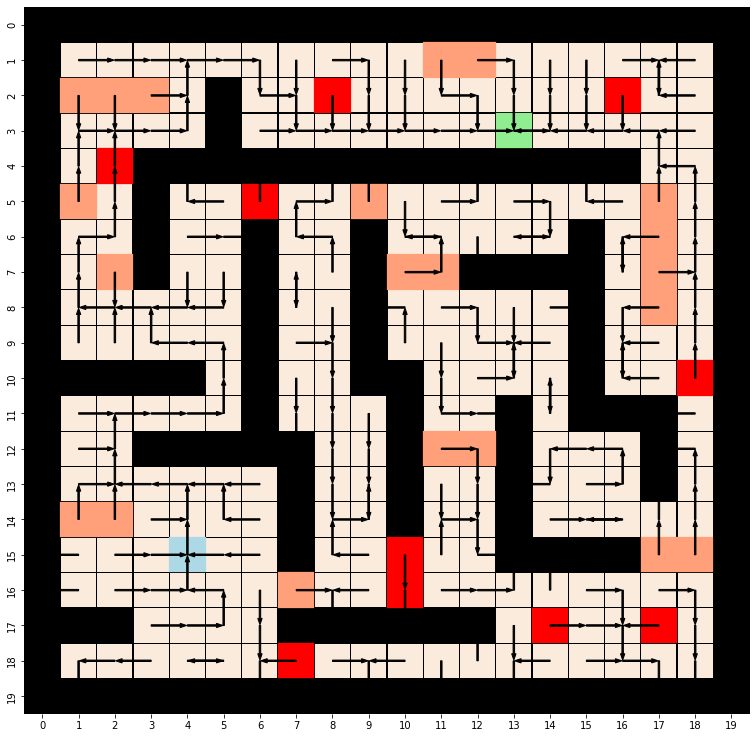

path found


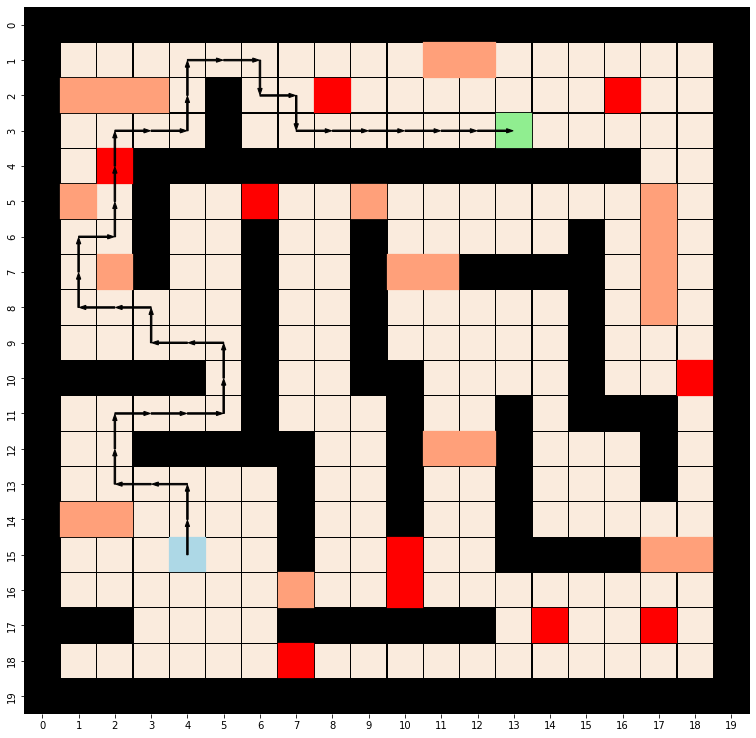

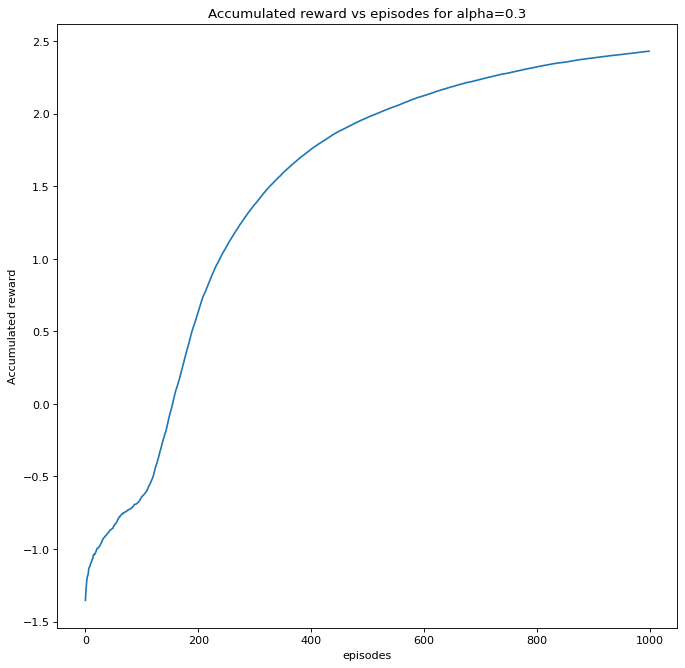

number of successful runs =8


In [ ]:
def run_SARSA_learning(no_of_runs):
  successful_runs_count=0
  rewards_across_runs=[]
  for i in range(no_of_runs):
    sarsa,rewards=SARSA_learning(value_matrix,4,0.1,0.3,0.95,0.02,1000,1000)
    policy=generate_Q_learning_policy(sarsa)
    rewards_across_runs.append(rewards)
    '''if(policy[start_state[0],start_state[1]]==3):
      policy_to_display=policy'''
    path=create_path_dict(policy)
    if(path_to_goal_exsists(path)):
      successful_runs_count+=1
      policy_to_display=policy
  rewards=average_rewards_across_runs(no_of_runs,rewards_across_runs)
  draw_graphs(policy_to_display,rewards)
  return rewards,successful_runs_count
sarsa_learning_rewards,successful_runs_count=run_SARSA_learning(10)
print("number of successful runs ={}".format(successful_runs_count))

**Actor-Critic**

In [ ]:
def actor_critic_action(action_space_size,policy,x,y):
  # returns 0,1,2,3
  poslist=[]
  #print(policy[0,0,0])
  for i in range(action_space_size):
    poslist.append(i)
  return np.random.choice(poslist,p=policy[x,y])

In [ ]:
def test_actor_critic_action():
  test_policy=np.array([[[0.25,0.25,0.25,0.25]]])
  #print(np.shape(test_policy))
  #print(actor_critic_action(4,test_policy,0,0))
  #assert(actor_critic_action(4,test_policy,0,0)==2 or actor_critic_action(4,test_policy,0,0)==3)
  test_policy2=np.zeros(shape=[1,2,4])
  print(np.shape(test_policy2))
  test_policy2[0,0]=[0.5,0.1,0.2,0.2]
  test_policy2[0,1]=[0.5,0.2,0.3,0.0]
  print(actor_critic_action(4,test_policy,0,0))
test_actor_critic_action()

(1, 2, 4)
1


In [ ]:
def recompute_policy(preference_matrix,policy_matrix,x,y,action_space_size):
  expo_sum=0
  for i in range(action_space_size):
    expo_sum+=np.exp(preference_matrix[x,y,i])
  for j in range(action_space_size):
    policy_matrix[x,y,j]=np.exp(preference_matrix[x,y,j])/expo_sum
  return policy_matrix

In [ ]:
def test_recompute_policy():
  test_policy=np.array([[[0,0.1,0.2,0.2]]])
  test_preference=np.array([[[0,0,0,0]]])
  ans=recompute_policy(test_preference,test_policy,0,0,4)
  assert(ans[0,0,0]==0.25)
  assert(ans[0,0,1]==0.25)
  assert(ans[0,0,2]==0.25)
  assert(ans[0,0,3]==0.25)
  # sum of all policy matrix at state should be 1
test_recompute_policy()

In [ ]:
from numpy.random.mtrand import f
def actor_critic(value_matrix,gamma,alpha,beta,action_space_size,episodes_limit,steps_limit,p):
  xdim=np.shape(value_matrix)[0]
  ydim=np.shape(value_matrix)[1]
  vMatrix=np.copy(value_matrix)
  preference_matrix=np.zeros(shape=(xdim,ydim,action_space_size))
  policy_matrix=np.zeros(shape=(xdim,ydim,action_space_size))
  #put np.nan in these matrices for wall states
  for i in range(xdim):
    for j in range(ydim):
      for a in range(action_space_size):
        policy_matrix[i,j,a]=(1/action_space_size)
      if(check_wall_state(i,j)):
        for k in range(action_space_size):
          preference_matrix[i,j,k]=np.nan
          policy_matrix[i,j,k]=np.nan
  rewards=[]
  endflag=False
  for i in range(episodes_limit):
    state=start_state
    cx=state[0]
    cy=state[1]
    step_count=0
    episode_Reward=0
    while(step_count<steps_limit):
      step_count+=1
      action_to_take=actor_critic_action(action_space_size,policy_matrix,cx,cy)
      ni,nj=stochastic_action_taken(action_to_take+1,cx,cy,p,action_space_size)
      reward,fx,fy=calc_reward(cx,cy,ni,nj)
      delta=reward+gamma*vMatrix[fx,fy] - vMatrix[cx,cy]
      vMatrix[cx,cy] = vMatrix[cx,cy]+alpha*delta
      preference_matrix[cx,cy,action_to_take]=preference_matrix[cx,cy,action_to_take]+beta*delta*(1-policy_matrix[cx,cy,action_to_take])
      #recompute policy for cx,cy
      policy_matrix=recompute_policy(preference_matrix,policy_matrix,cx,cy,action_space_size)
      cx=fx
      cy=fy
      episode_Reward+=reward
      if(check_goal(cx,cy)):
        #print("alpha value {} and beta value {} give path".format(alpha,beta))
        endflag=True
      if(endflag):
        break
    rewards.append(episode_Reward/step_count)
  return policy_matrix,rewards

In [ ]:
def test_actor_critic():
  test_policy,test_reward=actor_critic(value_matrix,0.95,0.01,0.001,4,1,1,0.02)
  print(test_policy[start_state[0],start_state[1]])
  print(test_reward)
test_actor_critic()

[0.25004687 0.25004687 0.2498594  0.25004687]
[-1.0]


In [ ]:
def generate_actor_critic_policy(policy_matrix):
  xdim=np.shape(policy_matrix)[0]
  ydim=np.shape(policy_matrix)[1]
  action_space_size=np.shape(policy_matrix)[2]
  policy=np.zeros(shape=(xdim,ydim))
  for i in range(xdim):
    for j in range(ydim):
      if(np.isnan(policy_matrix[i,j,0])):
        policy[i,j]=np.nan
        continue
      #policy[i][j]=actor_critic_action(action_space_size,policy_matrix,i,j)
      maxpos=0
      for k in range(action_space_size):
        if(policy_matrix[i,j,k]>policy_matrix[i,j,maxpos]):
          maxpos=k
      policy[i,j]=maxpos
  return policy

In [ ]:
def test_generate_actor_critic_policy():
  test_policy_matrix1=test_policy=np.array([[[0.0,0.2,0.7,0.1]]])
  print(np.shape(test_policy_matrix1))
  test_policy=generate_actor_critic_policy(test_policy_matrix1)
  print(test_policy[0,0])
  test_policy_matrix2=test_policy=np.array([[[np.nan,np.nan,np.nan,np.nan]]])
  test_policy2=generate_actor_critic_policy(test_policy_matrix2)
  assert(np.isnan(test_policy2[0,0]))
test_generate_actor_critic_policy()

(1, 1, 4)
2.0


10


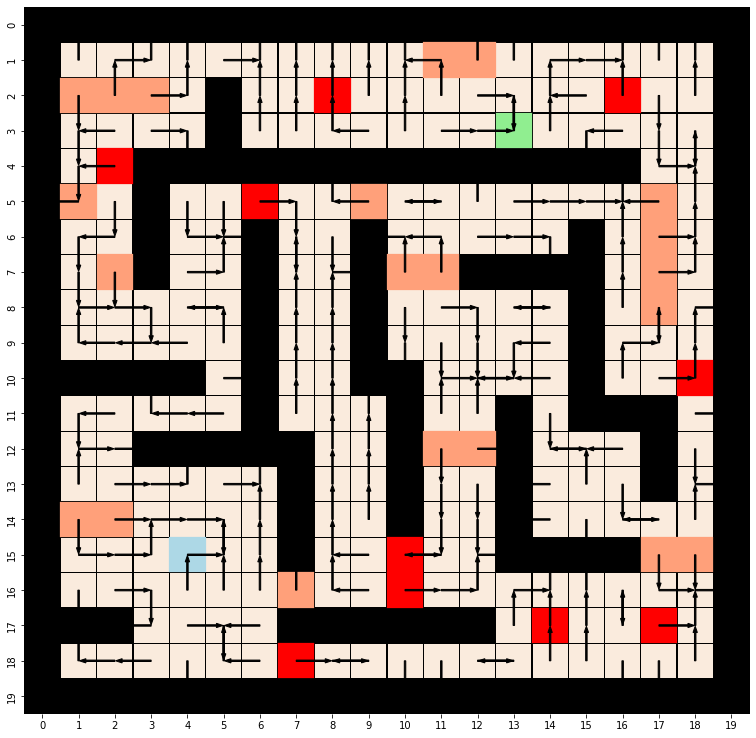

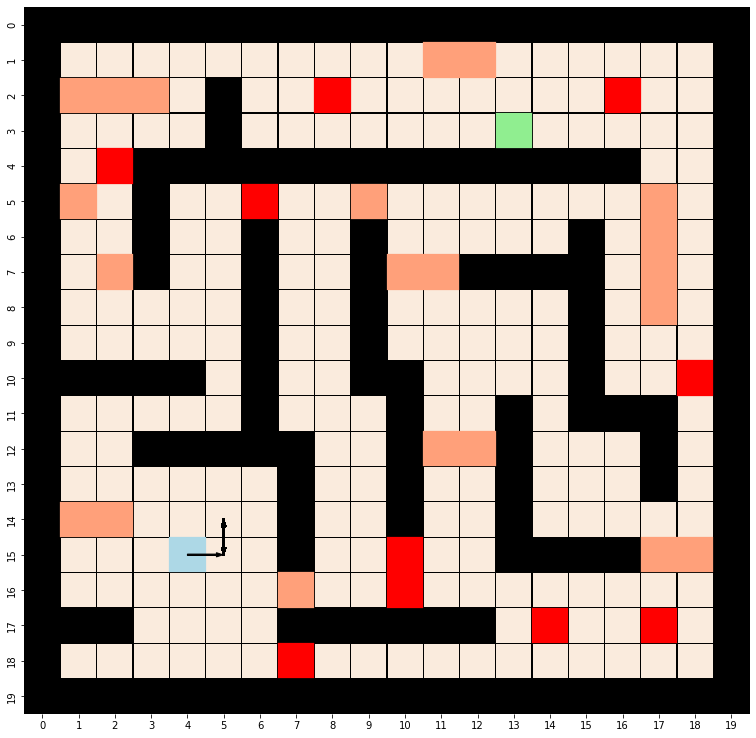

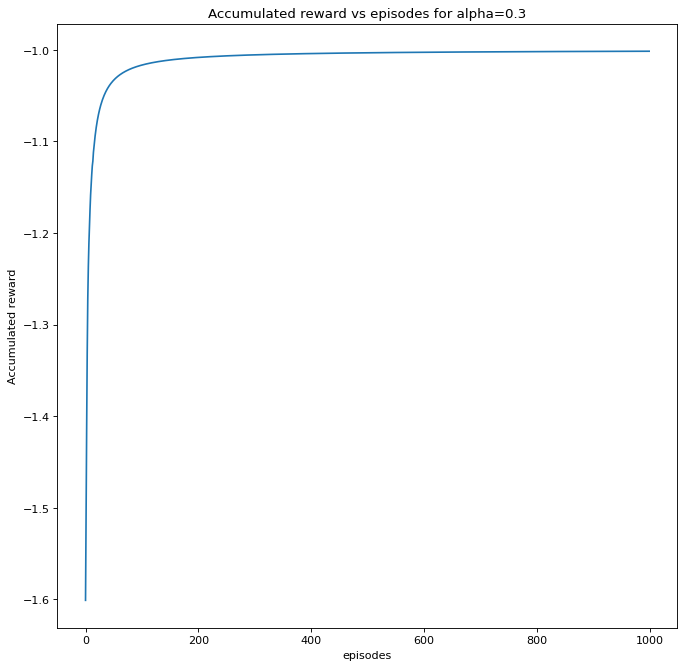

In [ ]:
def run_actor_critic(no_of_runs):
  rewards_across_runs=[]
  alpha_values=[0.1,0.05,0.01]
  beta_values=[0.05,0.01,0.005,0.001]
  policy_to_display=None
  for i in range(no_of_runs):
    policy_matrix,rewards=actor_critic(value_matrix,0.95,0.1,0.05,4,1000,1000,0.02)
    policy=generate_actor_critic_policy(policy_matrix)
    path_dictionary=create_path_dict(policy)
    if(path_to_goal_exsists(path_dictionary)):
      print("path found")
      policy_to_display=policy
    rewards_across_runs.append(rewards)
  print(len(rewards_across_runs))
  rewards=average_rewards_across_runs(no_of_runs,rewards_across_runs)
  if(policy_to_display!=None):
    policy=policy_to_display
  draw_graphs(policy,rewards)
  return rewards
actor_critic_learning_rewards=run_actor_critic(10)

In [ ]:
len(actor_critic_learning_rewards)

1000

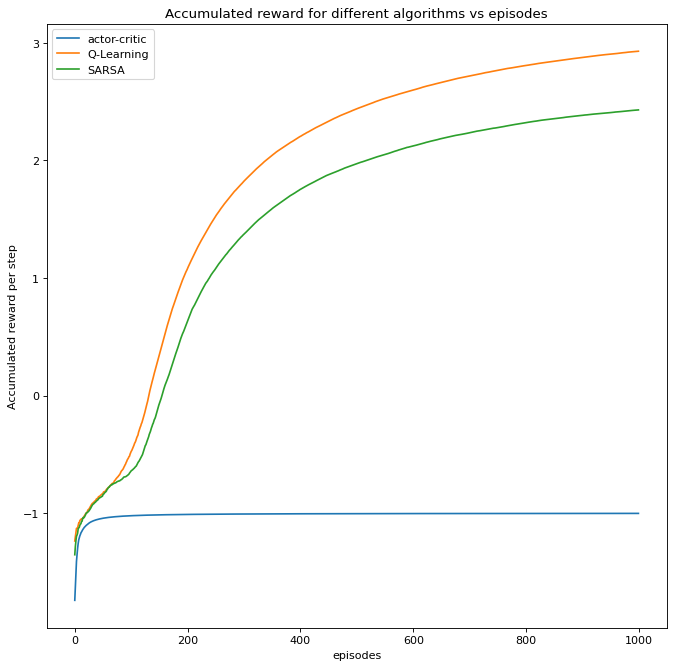

In [ ]:
fig, bob = plt.subplots(figsize=(10, 10),dpi=80)
bob.set(title = "Accumulated reward for different algorithms vs episodes",xlabel = "episodes", ylabel = "Accumulated reward per step")
bob.plot(range(1000),actor_critic_learning_rewards)
bob.plot(range(1000),q_learning_rewards)
bob.plot(range(1000),sarsa_learning_rewards)
plt.legend(['actor-critic','Q-Learning','SARSA'])
plt.show()